# NLP with pilotText

In [2]:
### Zafrin's project scheme (adapted to mine):

top left: sentences out of every post are labeled (with sentiments) by outside AWS database 
bottom left: dimentional distances between treatmnts / actions 

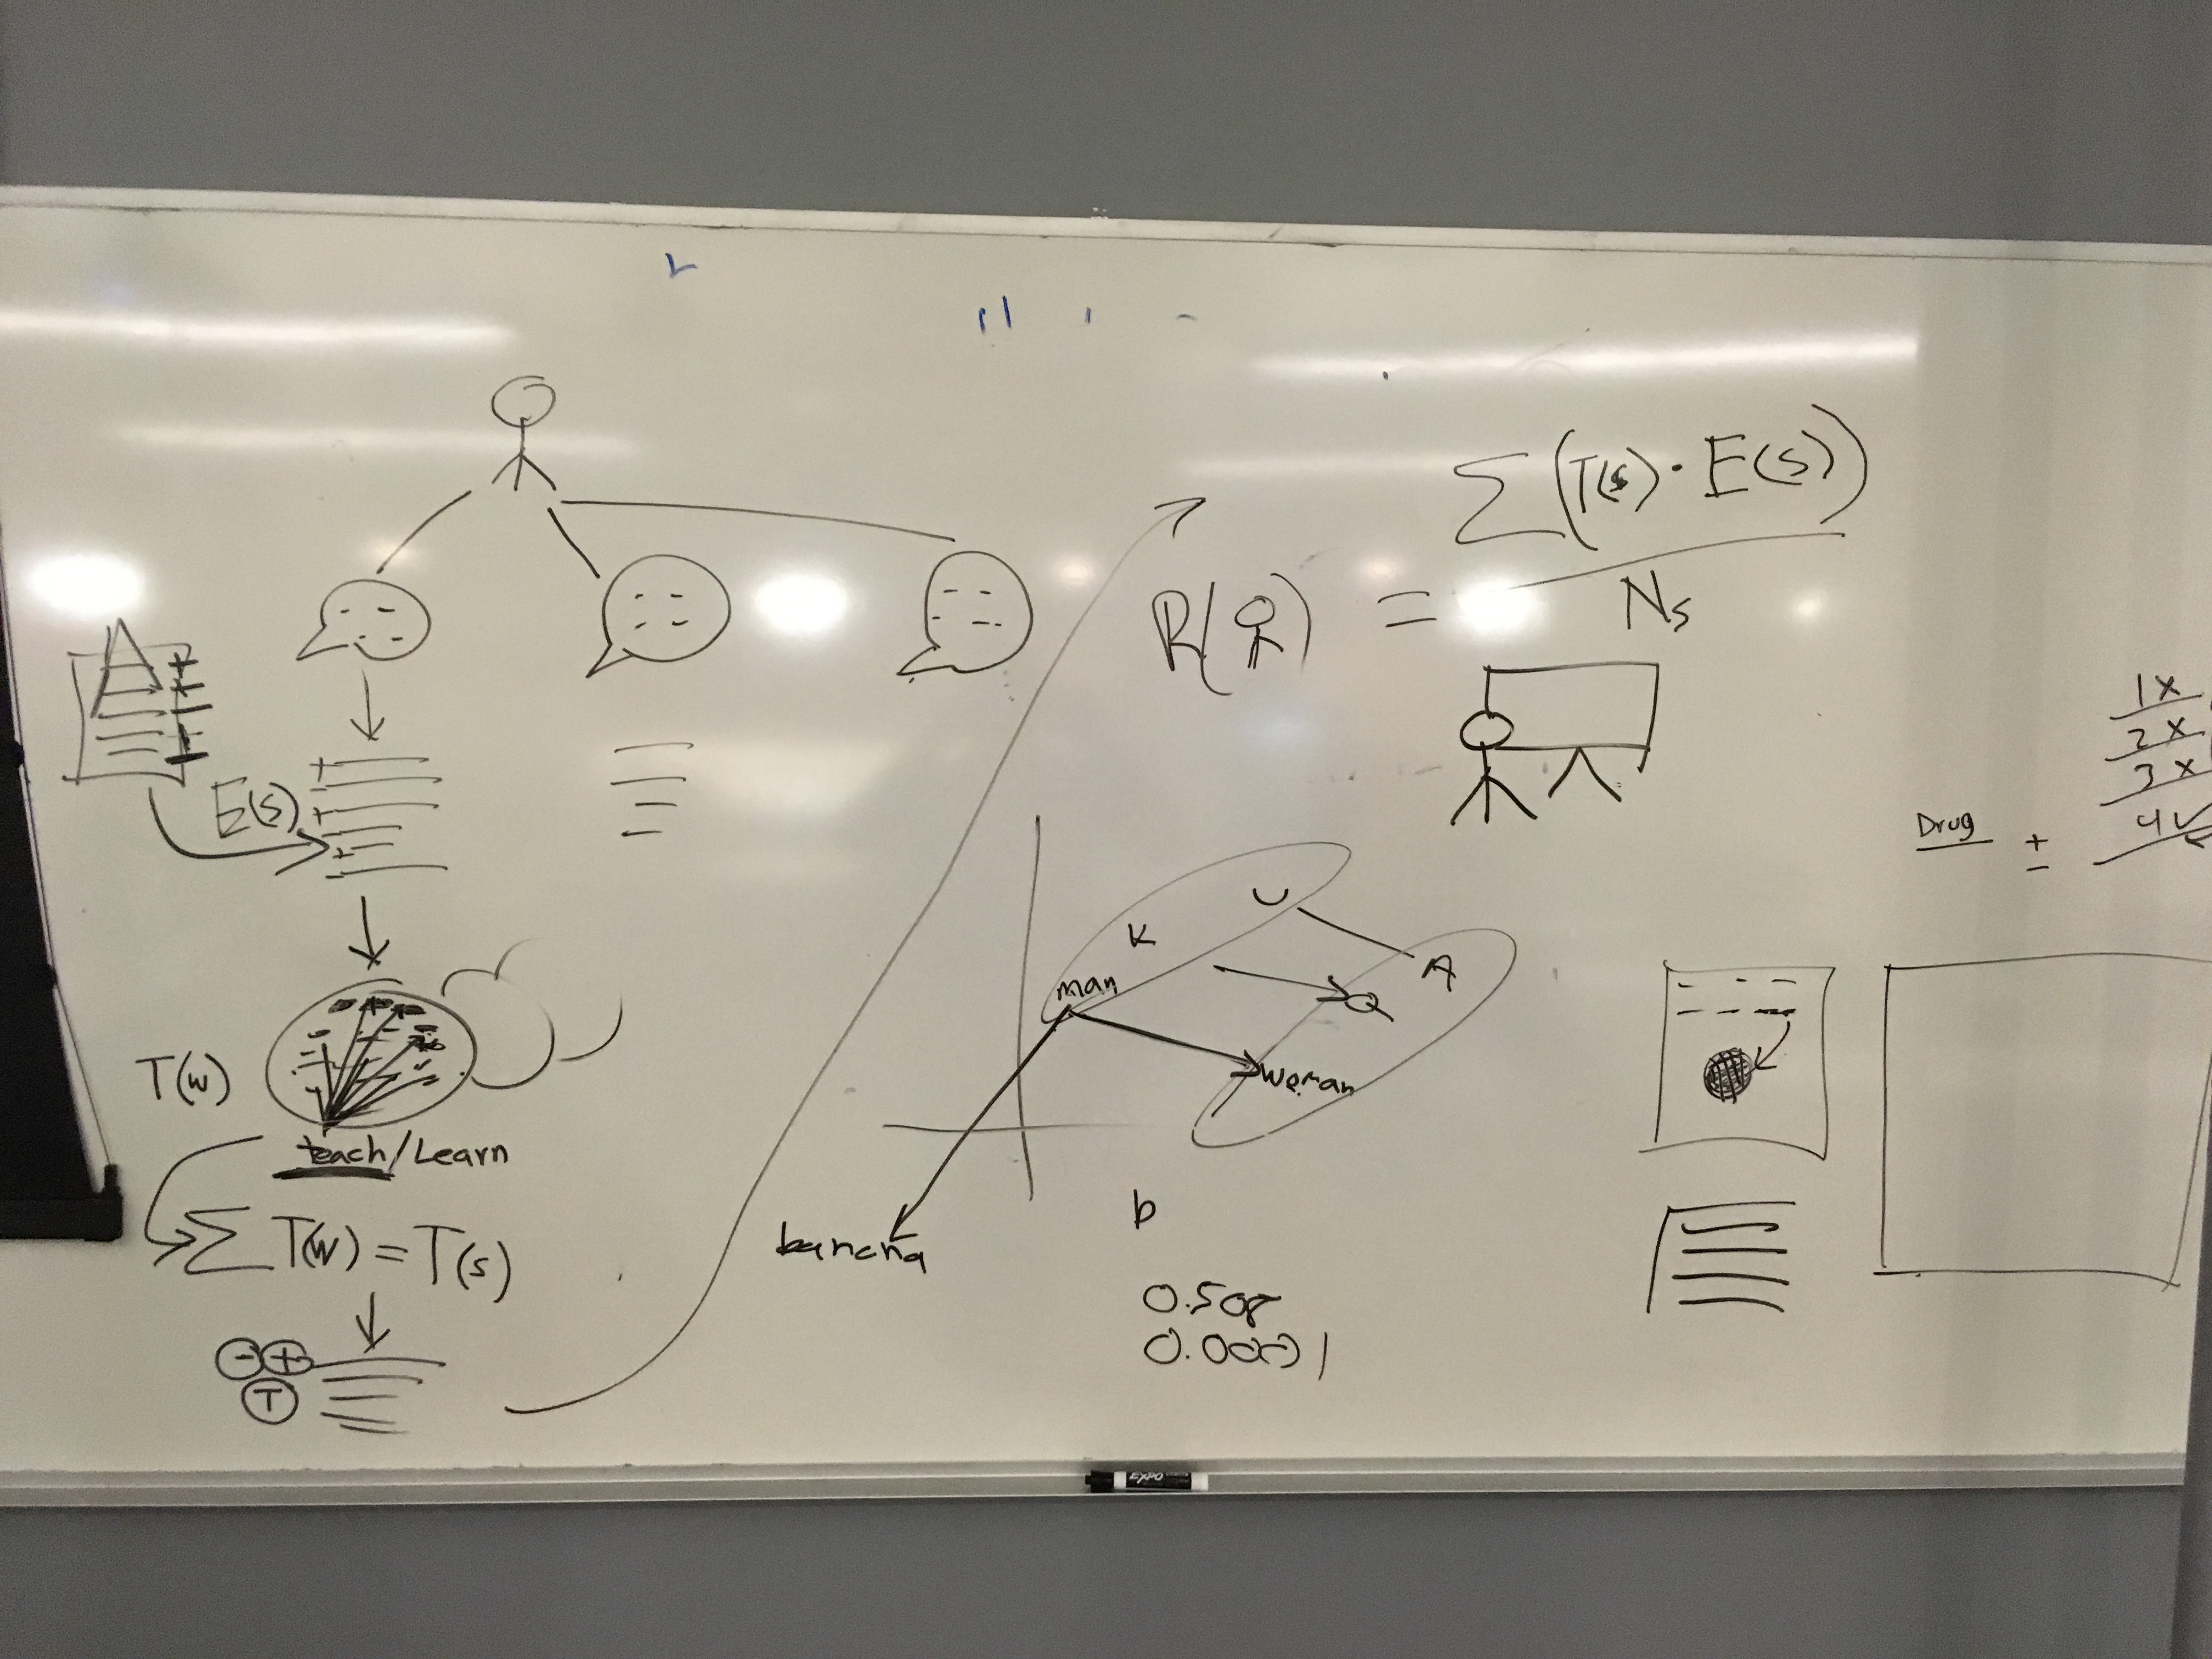

In [4]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
df=pd.read_excel('pilotText.xlsx')

In [6]:
df

,user_name,text
0,Lindsay Kestenbaum,I have hydrogen dominant SIBO C with some met...
1,Marsha Zaritsky,Biocidin is strong. I started with 1 drop. Too...
2,Lindsay Kestenbaum,Ok thank you! I bought the capsules so was go...
3,Marsha Zaritsky,Lindsay Kestenbaum You might be fine with taki...
4,Lindsay Kestenbaum,"Marsha Zaritsky thank you, that’s a good idea..."
5,Amanda Glassman,I don’t feel anything from the biocidin but h...
6,Lindsay Kestenbaum,Guess it can’t hurt to try it
7,Amanda Glassman,Lindsay Kestenbaum definitely!


In [7]:
df['user_id']=[1,2,1,2,1,3,1,3]

In [8]:
df=df[['user_id','user_name','text']]  ## rearanging the columns that user_id will be first

In [9]:
df

,user_id,user_name,text
0,1,Lindsay Kestenbaum,I have hydrogen dominant SIBO C with some met...
1,2,Marsha Zaritsky,Biocidin is strong. I started with 1 drop. Too...
2,1,Lindsay Kestenbaum,Ok thank you! I bought the capsules so was go...
3,2,Marsha Zaritsky,Lindsay Kestenbaum You might be fine with taki...
4,1,Lindsay Kestenbaum,"Marsha Zaritsky thank you, that’s a good idea..."
5,3,Amanda Glassman,I don’t feel anything from the biocidin but h...
6,1,Lindsay Kestenbaum,Guess it can’t hurt to try it
7,3,Amanda Glassman,Lindsay Kestenbaum definitely!


### Now let's use NLTK to pre-processing for SENTIMENT analysis. 
from: https://datascience.stackexchange.com/questions/11402/preprocessing-text-before-use-rnn

At a high level the sentiment analysis (using bag of words) will involve 4 steps:

Step 1: Data Assembly
    
Step 2: Data Processing
    
Step 3: Data Exploration or Visualization
    
Step 4: Model Building & Validation (train & test)
    
_______________________________________________
Lets understand different possible data preprocessing activities:

#### Convert text to lowercase – 
This is to avoid distinguish between words simply on case.

#### Remove Number – 
Numbers may or may not be relevant to our analyses. Usually it does not carry any importance in sentiment analysis

#### Remove Punctuation – 
Punctuation can provide grammatical context which supports understanding. For bag of words based sentiment analysis punctuation does not add value.

#### Remove English stop words – 
Stop words are common words found in a language. Words like for, of, are etc are common stop words.

#### Remove Own stop words(if required) – 
Along with English stop words, we could instead or in addition remove our own stop words. The choice of own stop word might depend on the domain of discourse, and might not become apparent until we’ve done some analysis.

#### Strip white space – 
Eliminate extra white spaces.

#### Stemming – 
Transforms to root word. Stemming uses an algorithm that removes common word endings for English words, such as “es”, “ed” and “’s”. For example i.e., 1) “computer” & “computers” become “comput”

#### Lemmatisation – 
transform to dictionary base form i.e., “produce” & “produced” become “produce”

#### Sparse terms – 
We are often not interested in infrequent terms in our documents. Such “sparse” terms should be removed from the document term matrix.

### Let's continue using this tutorial:
https://github.com/jadianes/data-science-your-way/blob/master/04-sentiment-analysis/README.md 

The class sklearn.feature_extraction.text.CountVectorizer in the wonderful scikit learn Python library converts a collection of text documents to a matrix of token counts. This is just what we need to implement later on our bag-of-words linear classifier.

First we need to init the vectoriser. We need to remove punctuations, lowercase, remove stop words, and stem words. All these steps can be directly performed by CountVectorizer if we pass the right parameter values. We can do this as follows. Notice that for the stemming step, we need to provide a stemmer ourselves. We will use a basic implementation of a Porter Stemmer, a stemmer widely used named after its creator.

based on http://www.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html:

In [10]:
import re  ## regular expression module 
from nltk import word_tokenize  ## natural language tool kit
from sklearn.feature_extraction.text import CountVectorizer        
from nltk.stem.porter import PorterStemmer


In [ ]:
# The idea is to do a vector of words from every sentence, using:
CountVectorizer = (
    analyzer = 'word',
    tokenizer = tokenize,
    lowercase = True,
    stop_words = 'english',
    max_features = 85
)
# tokenize here is as function writen in the next cells

#### Let's first follow the steps:

In [33]:
## before everything there should be a preprocess stage - divide text (tokenize) into sentences, so 
## every row would be a sentence and not a post
from nltk.tokenize import sent_tokenize
sent=sent_tokenize(df['text'][0])
print("post:")
print(df['text'][0])
print("___________________________________________________________________________")
print("sentence tokens:")
print(sent)

post:
 I have hydrogen dominant SIBO C with some methane. I just did a course of Xifaxan + Neomycin followed by Atrantil and then a blend of herbs called Candicid Forte (oregano oil etc). Nothing is helping. I think I saw a post earlier about Biocidin- I bought it and am willing to try it as recommended by my functional nutritionist. Wanted to see what experiences people had with it. Getting desperate here, any help appreciated!   
___________________________________________________________________________
sentence tokens:
[' I have hydrogen dominant SIBO C with some methane.', 'I just did a course of Xifaxan + Neomycin followed by Atrantil and then a blend of herbs called Candicid Forte (oregano oil etc).', 'Nothing is helping.', 'I think I saw a post earlier about Biocidin- I bought it and am willing to try it as recommended by my functional nutritionist.', 'Wanted to see what experiences people had with it.', 'Getting desperate here, any help appreciated!']


In [ ]:
# In this case sentiment would be better by using the whole post rather than every seperate sentence.

In [11]:
# choosing a post from the df to be our text:
df['text'][0]

' I have hydrogen dominant SIBO C with some methane. I just did a course of Xifaxan + Neomycin followed by Atrantil and then a blend of herbs called Candicid Forte (oregano oil etc). Nothing is helping. I think I saw a post earlier about Biocidin- I bought it and am willing to try it as recommended by my functional nutritionist. Wanted to see what experiences people had with it. Getting desperate here, any help appreciated!  \xa0'

In [12]:
## Here there should be a preprocess stage - divide text (tokenize) into sentences.

In [13]:
## let's remove everything that is not letters:
textLet = re.sub("[^a-zA-Z]", " ", df['text'][0])
textLet[0:48] ## just choosing 48 characters to look at the data

' I have hydrogen dominant SIBO C with some metha'

In [14]:
# Use this to turn text into list of words:
tokens = word_tokenize(textLet)
tokens[0:9] ## choosing 9 tokens just to look ..

['I', 'have', 'hydrogen', 'dominant', 'SIBO', 'C', 'with', 'some', 'methane']

In [15]:
# Let's choose a "stemmer":
stemmer = PorterStemmer()

In [16]:
# Let's make stem out of every word (stemming):
stemmed = []
for word in tokens:
    stemmed.append(stemmer.stem(word))
stemmed[0:9]

['I', 'have', 'hydrogen', 'domin', 'sibo', 'C', 'with', 'some', 'methan']

In [17]:
vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = True,
    stop_words = 'english'
)

In [18]:
# Step u.6
vectorizer.fit_transform(stemmed)

<74x35 sparse matrix of type '<class 'numpy.int64'>'
	with 36 stored elements in Compressed Sparse Row format>

In [19]:
vocab = vectorizer.get_feature_names()
print(vocab)

['ani', 'appreci', 'atrantil', 'biocidin', 'blend', 'bought', 'candicid', 'cours', 'desper', 'did', 'domin', 'earlier', 'experi', 'follow', 'fort', 'function', 'help', 'herb', 'hydrogen', 'just', 'methan', 'neomycin', 'noth', 'nutritionist', 'oil', 'oregano', 'peopl', 'post', 'recommend', 'saw', 'sibo', 'think', 'tri', 'want', 'xifaxan']


#### All these steps could be generelized by writing these functions, and then initiating the vectorizer (below):

In [20]:
#######
# based on http://www.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html
stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    # remove non letters
    text = re.sub("[^a-zA-Z]", " ", text)
    # tokenize
    tokens = word_tokenize(text)
    # stem
    stems = stem_tokens(tokens, stemmer)
    return stems
######## 

In [21]:
vectorizer = CountVectorizer(
    analyzer = 'word',
    tokenizer = tokenize,
    lowercase = True,
    stop_words = 'english',
    max_features = 85
)

In [22]:
#############################

In [23]:
# caryying-on from step u.6

In [24]:
corpus_data_features=vectorizer.fit_transform(stemmed)
corpus_data_features

<74x36 sparse matrix of type '<class 'numpy.int64'>'
	with 37 stored elements in Compressed Sparse Row format>

In [25]:
# Turnning into numpy (cause easier to play with and see)
corpus_data_features_nd = corpus_data_features.toarray()
corpus_data_features_nd.shape

(74, 36)

In [26]:
vocab = vectorizer.get_feature_names()
print(vocab)

['ani', 'appreci', 'atrantil', 'biocidin', 'blend', 'bought', 'c', 'candicid', 'cour', 'desper', 'did', 'domin', 'earlier', 'experi', 'follow', 'fort', 'function', 'help', 'herb', 'hydrogen', 'just', 'methan', 'neomycin', 'noth', 'nutritionist', 'oil', 'oregano', 'peopl', 'post', 'recommend', 'saw', 'sibo', 'think', 'tri', 'want', 'xifaxan']


In [27]:
# Sum up the counts of each vocabulary word
dist = np.sum(corpus_data_features_nd, axis=0)
    
# For each, print the vocabulary word and the number of times it 
# appears in the data set
for tag, count in zip(vocab, dist):
    print(count, tag)

1 ani
1 appreci
1 atrantil
1 biocidin
1 blend
1 bought
1 c
1 candicid
1 cour
1 desper
1 did
1 domin
1 earlier
1 experi
1 follow
1 fort
1 function
2 help
1 herb
1 hydrogen
1 just
1 methan
1 neomycin
1 noth
1 nutritionist
1 oil
1 oregano
1 peopl
1 post
1 recommend
1 saw
1 sibo
1 think
1 tri
1 want
1 xifaxan


## Next steps: preprocess - divide text into sentences 

### (from NLP_helloWorld.ipynb) So our features is the tf (our X) and we need to multiply it by the idf (weights). obviously there is a function for that:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['text'])